In [1]:
import pandas as pd
from sklearn import preprocessing

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
locations = pd.read_csv('data/loc-brightkite_totalCheckins.txt', sep='\t',
                        header=None, names=['Id', 'Timestamp', 'Lat', 'Long', 'LocationId'],
                        dtype={'Id': int, 'Lat': float, 'Long': float},  parse_dates=[1])
locations = locations[locations.LocationId.astype(str).apply(len) > 27] # cleaning empty locations
locations = locations[(locations.Lat != 0) | (locations.Long != 0)] # cleaning locations like (0, 0)
locations.Timestamp = locations.Timestamp.astype(int) # // 10 ** 9

In [3]:
locations[['Lat', 'Long', 'Timestamp']] = preprocessing.scale(locations[['Lat', 'Long', 'Timestamp']], axis=0)

/usr/local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:160: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


In [40]:
communities_arctan = pd.read_csv('data/brightkite_communities.arctan.csv',
                                 header=None, sep=' ', names=['Id', 'CommunityId'])
communities_uniform = pd.read_csv('data/brightkite_communities.uniform.csv',
                                  header=None, sep=' ', names=['Id', 'CommunityId'])
communities_exp = pd.read_csv('data/brightkite_communities.exp.csv',
                              header=None, sep=' ', names=['Id', 'CommunityId'])

In [5]:
len(set(communities_uniform.CommunityId))

16084

In [6]:
len(set(communities_exp.CommunityId))

36808

In [7]:
uniform_counts = communities_uniform.groupby('CommunityId', as_index=False) \
    .count() \
    .sort_values('Id') \
    .rename(index=str, columns={'Id' : 'Counts'})

In [8]:
st_counts_exp = communities_exp.groupby('CommunityId', as_index=False) \
    .count() \
    .sort_values('Id') \
    .rename(index=str, columns={'Id' : 'Counts'})

In [41]:
st_counts_tan = communities_arctan.groupby('CommunityId', as_index=False) \
    .count() \
    .sort_values('Id') \
    .rename(index=str, columns={'Id' : 'Counts'})

In [42]:
st_counts_tan.Counts.describe()

count    26840.000000
mean         2.169449
std          7.483667
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max        581.000000
Name: Counts, dtype: float64

In [32]:
st_counts.Counts.quantile(0.999)

80.75100000000384

In [44]:
len(st_counts_tan.Counts[st_counts_tan.Counts > 1])

6761

In [62]:
st_counts_tan.Counts.median()

1.0

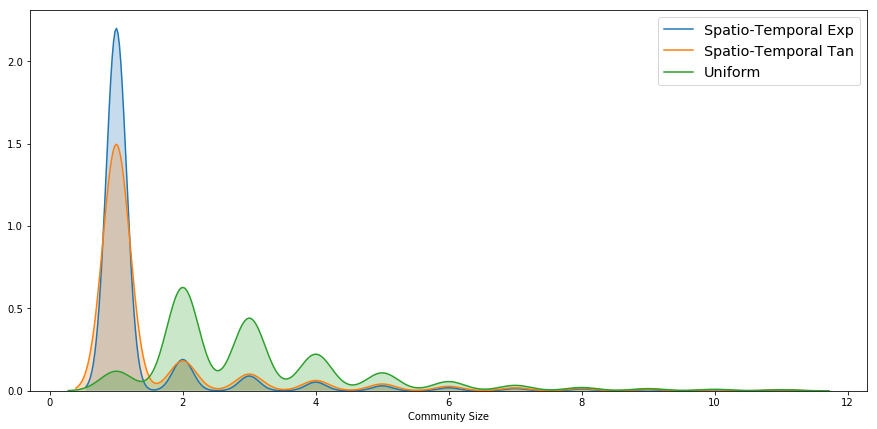

In [60]:
plt.figure(figsize=(15, 7))

# plt.yscale('log')
# plt.xscale('log')
limit = 12
plt.xlabel('Community Size')
sns.kdeplot(data=st_counts.Counts[st_counts.Counts < limit], shade=True, kernel='gau', gridsize=500)
sns.kdeplot(data=st_counts_tan.Counts[st_counts_tan.Counts < limit], shade=True, kernel='gau', gridsize=500)
sns.kdeplot(data=uniform_counts.Counts[uniform_counts.Counts < limit], shade=True, kernel='gau', gridsize=500)
plt.legend(['Spatio-Temporal Exp', 'Spatio-Temporal Tan', 'Uniform'], fontsize='x-large')

In [139]:
st_counts[st_counts.Counts > 20]

,CommunityId,Counts
1086,1604,21
30173,48164,21
22116,35646,21
1695,2625,21
12458,20050,21
14234,22950,21
19367,31467,21
7519,11920,21
26441,42387,21
24635,39576,21


In [117]:
communities_uniform.groupby('CommunityId', as_index=False).count

<bound method DataFrameGroupBy.count of <pandas.core.groupby.DataFrameGroupBy object at 0x11a4a0e80>>

In [118]:
communities_uniform.groupby('CommunityId', as_index=False).count

<bound method DataFrameGroupBy.count of <pandas.core.groupby.DataFrameGroupBy object at 0x11a4a0518>>

In [8]:
# len(set(communities_arctan.CommunityId))

In [9]:
def community_size(community):
    return (community.Lat.max() - community.Lat.min()) * \
           (community.Long.max() - community.Long.min()) * \
           (community.Timestamp.max() - community.Timestamp.min())

In [10]:
# st_community_sizes = communities_arctan \
#     .merge(locations, on='Id') \
#     .groupby(by='CommunityId') \
#     .apply(community_size)

In [11]:
st_community_sizes_exp = communities_exp \
    .merge(locations, on='Id') \
    .groupby(by='CommunityId') \
    .apply(community_size)

In [12]:
community_sizes = communities_uniform \
    .merge(locations, on='Id') \
    .groupby(by='CommunityId') \
    .apply(community_size)

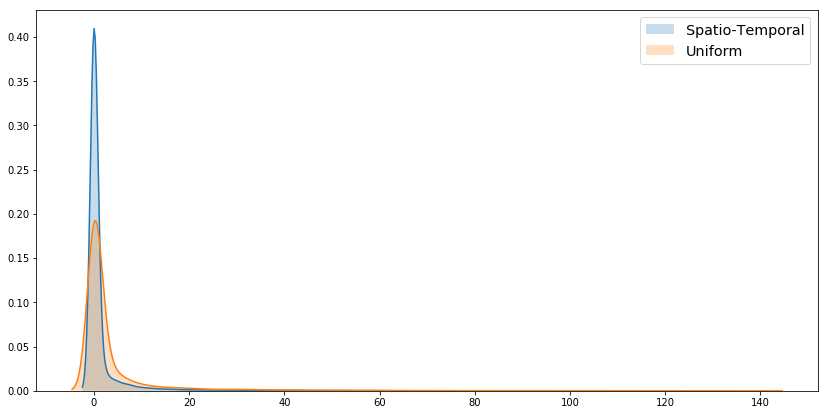

In [82]:
plt.figure(figsize=(14, 7))

# plt.xscale('log')
sns.kdeplot(data=st_community_sizes_exp, shade=True, kernel='gau', gridsize=500)
sns.kdeplot(data=community_sizes, shade=True, kernel='gau', gridsize=500)
plt.legend(['Spatio-Temporal', 'Uniform'], fontsize='x-large')

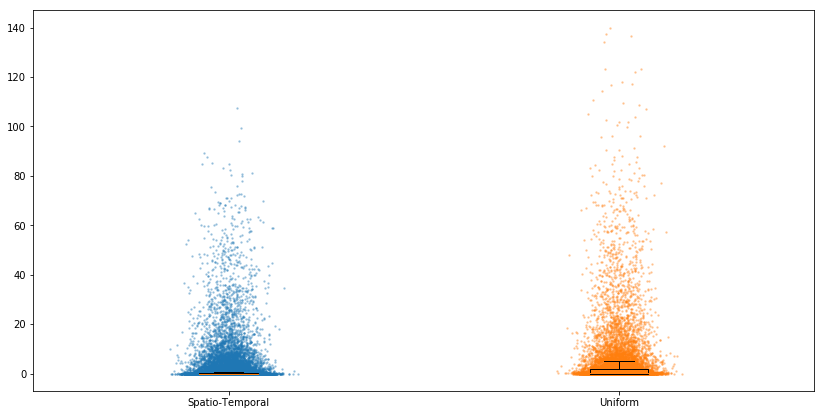

In [75]:
plt.figure(figsize=(14, 7))

data = [st_community_sizes_exp, community_sizes]

for i in range(len(data)):
    y = data[i]
    x = np.random.normal(1+i, 0.04, size=len(y))
    P.plot(x, y, '.', alpha=0.3, markersize=3)
    
bp = plt.boxplot(data, labels=['Spatio-Temporal', 'Uniform'], flierprops={'alpha': 0.01, 'markersize': 0})

P.show()

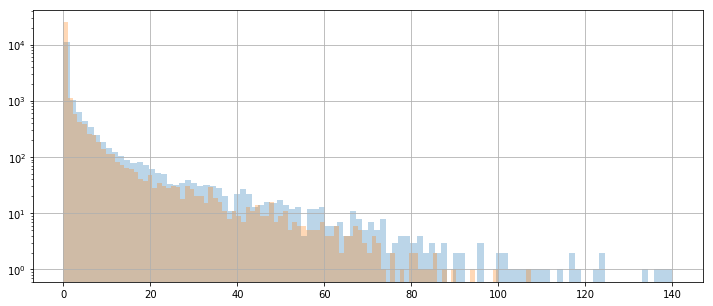

In [78]:
plt.figure(figsize=(12, 5))
plt.yscale('log', nonposy='clip')

community_sizes.hist(bins=100, alpha=0.3)
st_community_sizes_exp.hist(bins=100, alpha=0.3)

In [39]:
st_community_sizes_exp.mean() < community_sizes.mean()

True

In [43]:
biggest_uniform_id = community_sizes.argmax()

In [54]:
biggest_community = communities_uniform[communities_uniform.CommunityId == biggest_uniform_id][['Id']]

In [55]:
st_subcommunities = pd.merge(biggest_community, communities_exp, on='Id')

In [107]:
biggest_subcommunities = st_subcommunities.groupby(by='CommunityId', as_index=False) \
    .count() \
    .sort_values(by='Id', ascending=False) \
    .head(5)
biggest_subcommunities

,CommunityId,Id
295,10652,17
286,10639,14
283,10634,12
571,16240,12
262,10559,9


In [112]:
# 38417, 35744, 10427, 21827, 2818, 11312
jsonstr = pd.merge(st_subcommunities, locations, on='Id') \
            .groupby(by='Id', as_index=False) \
            .head(5) \
        .query("CommunityId in [10652, 10639, 10634]") \
        .head(30000).to_json(orient='records')

In [113]:
# Display the Dive visualization for this data
from IPython.core.display import display, HTML

HTML_TEMPLATE = """<link rel="import" href="/nbextensions/facets-dist/facets-jupyter.html">
        <facets-dive id="elem" height="600"></facets-dive>
        <script>
          var data = JSON.parse('{jsonstr}');
          document.querySelector("#elem").data = data;
        </script>"""
html = HTML_TEMPLATE.format(jsonstr=jsonstr)
display(HTML(html)) 

In [94]:
biggest_st_id = st_community_sizes_exp.argmax()

In [67]:
biggest_st_community = communities_exp[communities_exp.CommunityId == biggest_st_id][['Id']]

In [68]:
uniform_subcommunities = pd.merge(biggest_st_community, communities_uniform, on='Id')

In [69]:
len(set(uniform_subcommunities.CommunityId))

25

In [70]:
uniform_subcommunities

,Id,CommunityId
0,26181,7528
1,26205,6222
2,17754,17754
3,15108,15108
4,26190,18951
5,26202,2839
6,26175,26175
7,26193,7528
8,26187,2839
9,6222,16095
